<a href="https://colab.research.google.com/github/thekaszsz/project-Yongsan_python.miniproject/blob/main/%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%89%E1%85%A1%E1%86%AB%E1%84%8B%E1%85%A7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A7%E1%86%A8%E1%84%89%E1%85%A6%E1%86%AB%E1%84%90%E1%85%A5_1%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%8E%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 확률 변수

In [ ]:
def pmf_coin(outcome):
    ''' ## docstring
    본 함수는 동전을 던졌을 때 나오는 결과(Head 혹은 Tail)를 입력값으로 받는다.
    입력값 outcome이 Head와 Tail 둘 중 하나일 때는 0.5, 그 외에는 0이 확률이 된다.
    확률 변수의 형식으로, 주어진 outcome에 대한 확률을 출력한다.
    '''
    if outcome in ('Head', 'Tail'):
        p = 0.5
    else:
        p = 0

    print(f"P(X = x) = {p:.2f}") ## f string

In [ ]:
pmf_coin('Head')

pmf_coin('Tail')

pmf_coin('etc')

P(X = x) = 0.50
P(X = x) = 0.50
P(X = x) = 0.00


### 정규 분포

In [ ]:
from scipy.stats import norm


def pdf_norm(x, mu=0, sigma=1):
    '''
    주어진 x, mu, sigma에 관한 정규 분포의 확률 값을 출력한다.
    '''
    prob = norm.pdf(x, mu, sigma)
    print(f"P(X={x}; mu={mu}, sigma={sigma}) = {prob:.2f}")

In [ ]:
pdf_norm(0)

pdf_norm(1.96, 0, 1)

pdf_norm(-1, 2, 10)

P(X=0; mu=0, sigma=1) = 0.40
P(X=1.96; mu=0, sigma=1) = 0.06
P(X=-1; mu=2, sigma=10) = 0.04


### 이항 분포

In [ ]:
from scipy.stats import binom
def pdf_binom(x, n, p):
    '''
    주어진 x, n, p 관한 이항 분포의 확률 값을 출력한다.
    '''
    prob = binom.pmf(x, n, p)
    print(f"P(X={x}; n={n}, p={p}) = {prob:.2f}")

In [ ]:
pdf_binom(x=3, n=10, p=0.3)

pdf_binom(x=7, n=10, p=0.7)

pdf_binom(x=50, n=100, p=0.1)

P(X=3; n=10, p=0.3) = 0.27
P(X=7; n=10, p=0.7) = 0.27
P(X=50; n=100, p=0.1) = 0.00


In [ ]:
pdf_binom(50, 100, 0.5)

P(X=50; n=100, p=0.5) = 0.08


**p-value 응옹**

In [ ]:
from scipy.stats import binom
def pdf_binom(x, n, p):
    '''
    주어진 x, n, p 관한 이항 분포의 확률 값을 출력한다.
    '''
    prob = binom.pmf(x, n, p)
#     print(f"P(X={x}; n={n}, p={p}) = {prob:.2f}")
    return prob

In [ ]:
"""
n = 100, p = 0.5라고 가정했을 때
앞면이 60번이 나왔다면
p-value는 몇일까?
60번 뿐 아니라 60~100번(60 혹은 그보다 극단적인 모든 경우의 수)
60번 뿐 아니라 0~40번(60 혹은 그보다 극단적인 모든 경우의 수)
"""

p_value = (
    sum([pdf_binom(i, 100, 0.5) for i in range(60, 101)]) +
    sum([pdf_binom(i, 100, 0.5) for i in range(0, 41)])
)
print(f"p-value: {p_value:.4f}")

p-value: 0.0569


In [ ]:
from scipy import stats

In [ ]:
stats.binom_test(60, n=100, p=0.5)
## warning 주의

/var/folders/5y/hn7nkts90ls23_w1w6wfrkh40000gn/T/ipykernel_24851/1859907924.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(60, n=100, p=0.5)


0.05688793364098088

**버전 확인**
- 1.12.0부터 사라지는데, 지금 버전?

In [ ]:
import scipy

scipy.__version__ ## 제 컴퓨터 기준 1.10.1이니까 주의

'1.10.1'

In [ ]:
stats.binomtest(60, n=100, p=0.5)

BinomTestResult(k=60, n=100, alternative='two-sided', statistic=0.6, pvalue=0.05688793364098088)

In [ ]:
stats.binomtest(60, n=100, p=0.6)

BinomTestResult(k=60, n=100, alternative='two-sided', statistic=0.6, pvalue=1.0)

In [ ]:
stats.binomtest(60, n=100, p=0.1)

BinomTestResult(k=60, n=100, alternative='two-sided', statistic=0.6, pvalue=2.1909398776320826e-34)

### 포아송

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

def pmf_poisson_graphing(lamb):
    '''
    주어진 lambda에 대한 확률값을 시각화한다.
    x의 범위는 [0, 3*lambda]이다.
    '''
    xs = range(3*lamb)
    ps = [poisson.pmf(i, lamb) for i in xs]

    plt.plot(xs, ps, marker='o')
    plt.title(f"Poisson({lamb})")
    plt.show()

In [ ]:
lamb = 20000

In [ ]:
%%time
xs = range(3*lamb)
ps_loop = [poisson.pmf(i, lamb) for i in xs]

CPU times: user 1.71 s, sys: 70.7 ms, total: 1.78 s
Wall time: 1.75 s


In [ ]:
%%time
xs = range(3*lamb)
ps_vectorize = poisson.pmf(xs, lamb)

CPU times: user 3.61 ms, sys: 1.39 ms, total: 5 ms
Wall time: 4.44 ms


In [ ]:
assert (ps_loop != ps_vectorize).sum() == 0

**numpy vs list**

In [ ]:
import numpy as np

In [ ]:
n = 5000000
array_np = np.arange(0, n)
array_list = list(range(n))

In [ ]:
%%time
array_np2 = array_np * 2

CPU times: user 3.86 ms, sys: 5.36 ms, total: 9.22 ms
Wall time: 8.15 ms


In [ ]:
%%time
array_list2 = [i*2 for i in array_list]

CPU times: user 97.8 ms, sys: 36.8 ms, total: 135 ms
Wall time: 141 ms


In [ ]:
## 값이 같은지 검증
for x, y in zip(array_np2, array_list2):
    assert x == y

In [ ]:
## 값이 같은지 검증
for x, y in zip(array_np2, array_list):
    assert x == y

AssertionError: 

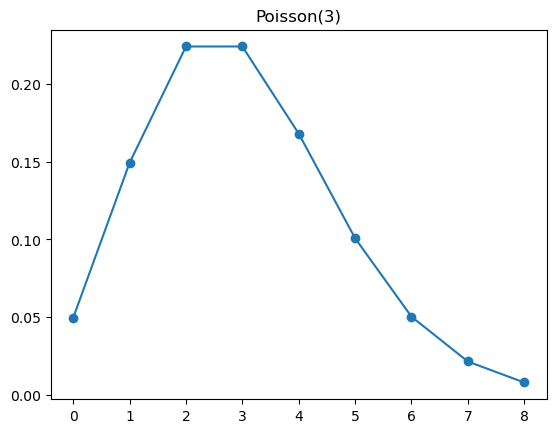

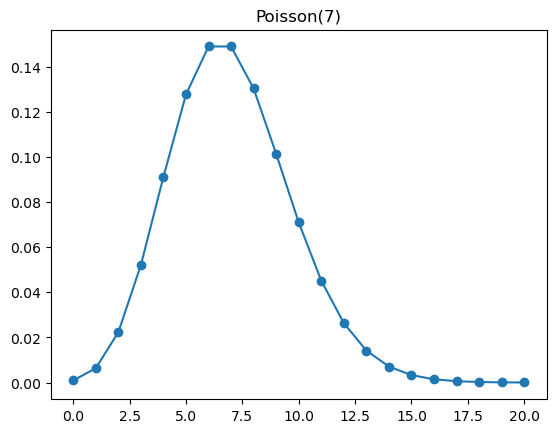

In [ ]:
pmf_poisson_graphing(3)

pmf_poisson_graphing(7)

### 근사

In [ ]:
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt

def poisson_binom_plot(n, p):
    lamb = n*p
    mu = n*p
    std = (n*p*(1-p))**0.5

    x_min = int(-n*0.2)
    x_max = int(n*1.2)

    probs_binom = [binom.pmf(i,n,p) for i in range(x_min, x_max+1)]
    probs_poisson = [poisson.pmf(i, lamb) for i in range(x_min, x_max+1)]
    probs_norm = [norm.pdf(i, mu, std) for i in range(x_min, x_max+1)]

    plt.plot(range(x_min, x_max+1), probs_binom, alpha=0.5)
    plt.plot(range(x_min, x_max+1), probs_poisson, alpha=0.5)
    plt.plot(range(x_min, x_max+1), probs_norm, alpha=0.5)
    plt.legend(['binom', 'poisson', 'norm'])
    plt.title(f'N={n}, p={p}')
    plt.show()

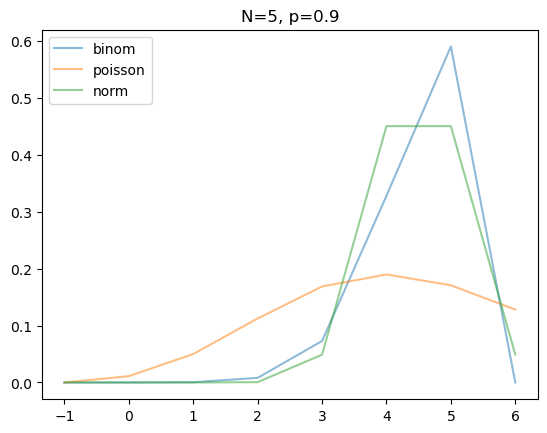

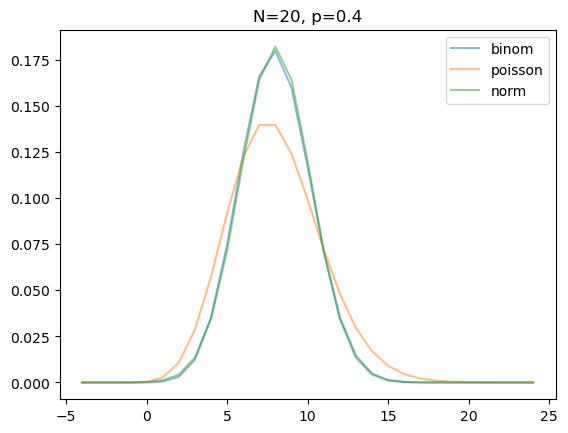

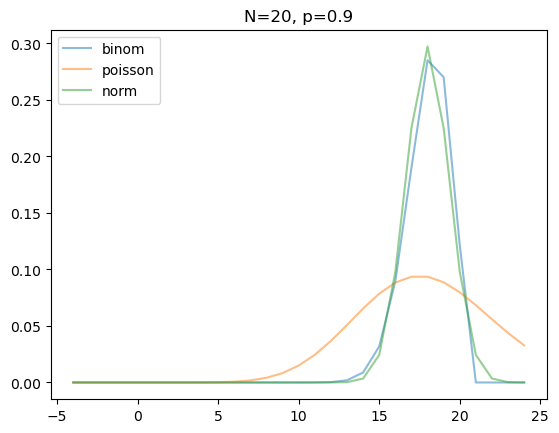

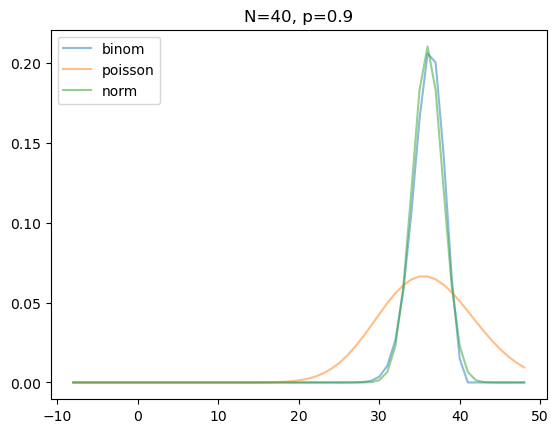

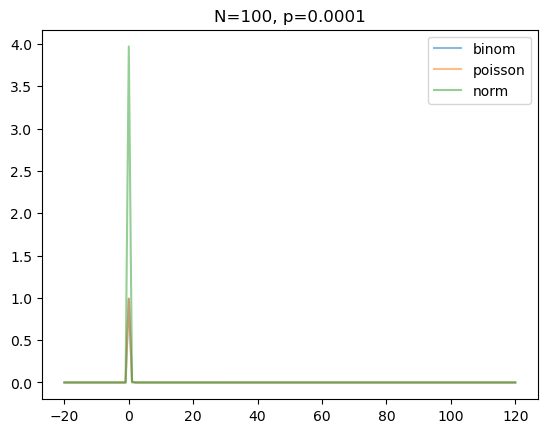

In [ ]:
poisson_binom_plot(5, 0.9)
poisson_binom_plot(20, 0.4)
poisson_binom_plot(20, 0.9)
poisson_binom_plot(40, 0.9)
poisson_binom_plot(100, 0.0001)

### CLT

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

def chi_mean_distribution(df, n):
    sample_means = []
    for _ in range(n):
        samples = np.random.chisquare(df, 10) # 10개의 샘플 추출
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    xs = np.arange(0, df*3, 0.1)
    ps = [chi2.pdf(x, df) for x in xs]
    plt.hist(sample_means, density=True, bins=50)
    plt.plot(xs, ps)
    plt.legend([f'chi-squared(df={df})', 'sample mean'])
    plt.show()
    plt.show()

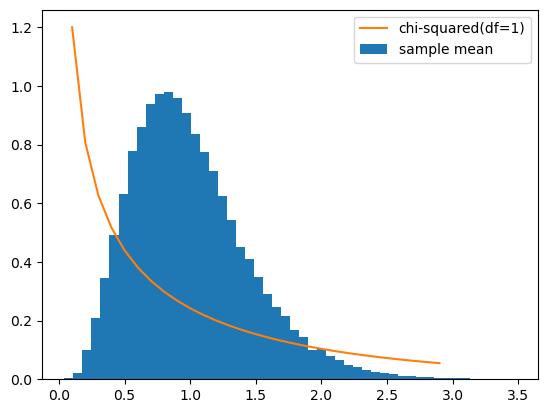

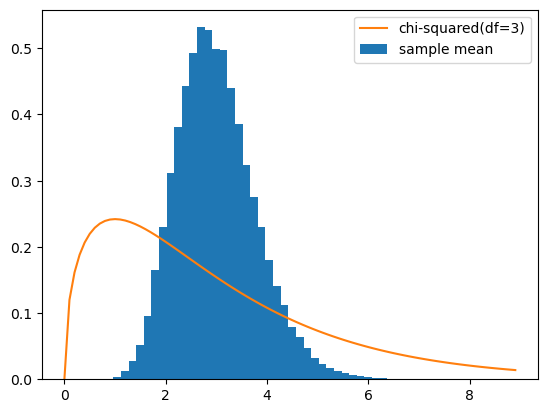

In [ ]:
chi_mean_distribution(1, 100000)

chi_mean_distribution(3, 100000)